In [1]:
import pandas as pd
import anndata
import numpy
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Parameter

In [2]:
delta_dmr_rate_cutoff = 0.3

In [3]:
# Parameters
delta_dmr_rate_cutoff = 0.3


## Load Data

In [4]:
dmr_hits = anndata.read_h5ad('RelatedClusterAndDMR.hypo_hits.h5ad')
dmr_hits = pd.DataFrame(dmr_hits.X.astype(bool).todense(), index=dmr_hits.obs_names, columns=dmr_hits.var_names)
dmr_hits.head()

index,CGE-Lamp5_Dock5,CGE-Lamp5_Grid1,CGE-Lamp5_Grk5,CGE-Lamp5_Nrxn3,CGE-Lamp5_Sorcs1,CGE-Vip_Ccser1,CGE-Vip_Clstn2,CGE-Vip_Fstl4,CGE-Vip_Galnt17,CGE-Vip_Grm8,...,MGE-Sst_Dock4,MGE-Sst_Etv1,MGE-Sst_Frmd6,MGE-Sst_Kcnip4,MGE-Sst_Ptpre,MGE-Sst_Rerg,MGE-Sst_Rxra,MGE-Sst_Ubtd1,MGE-Sst_Unc5b,Unc5c_Unc5c
index,,,,,,,,,,,,,,,,,,,,,
Subchr1_15,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,True,False,False,False,False
Subchr1_16,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Subchr1_28,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
Subchr1_45,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
Subchr1_56,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
dmr_rate = pd.read_msgpack('RelatedClusterAndDMR.mcg_rate.msg')
dmr_rate.head()

,CGE-Lamp5_Dock5,CGE-Lamp5_Grid1,CGE-Lamp5_Grk5,CGE-Lamp5_Nrxn3,CGE-Lamp5_Sorcs1,CGE-Vip_Ccser1,CGE-Vip_Clstn2,CGE-Vip_Fstl4,CGE-Vip_Galnt17,CGE-Vip_Grm8,...,MGE-Sst_Dock4,MGE-Sst_Etv1,MGE-Sst_Frmd6,MGE-Sst_Kcnip4,MGE-Sst_Ptpre,MGE-Sst_Rerg,MGE-Sst_Rxra,MGE-Sst_Ubtd1,MGE-Sst_Unc5b,Unc5c_Unc5c
index,,,,,,,,,,,,,,,,,,,,,
Subchr1_15,0.854167,0.934783,0.881720,1.000000,1.000000,0.948718,0.952381,0.955556,0.954545,0.888889,...,0.882353,0.500000,0.177778,1.000000,0.562500,0.408163,0.846154,0.930556,0.777778,0.862069
Subchr1_16,1.000000,1.000000,1.000000,NaN,1.000000,0.833333,1.000000,NaN,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN
Subchr1_28,0.700000,0.916667,0.906977,0.857143,0.833333,1.000000,1.000000,0.533333,1.000000,1.000000,...,0.935484,0.000000,0.731707,0.777778,0.666667,0.916667,0.416667,0.625000,1.000000,0.937500
Subchr1_45,0.480000,0.600000,0.358025,0.900000,1.000000,0.620690,0.952381,0.833333,0.926829,0.944444,...,0.866667,0.888889,0.813084,1.000000,0.866667,0.940000,0.945946,0.915254,1.000000,0.500000
Subchr1_56,0.424242,0.414634,0.550000,0.750000,0.789474,0.724138,0.588235,0.619048,0.491525,0.769231,...,0.803922,0.500000,0.783019,0.804878,0.718750,0.673469,0.833333,0.758065,0.636364,0.621622


In [6]:
dmg = pd.read_msgpack('RelatedDMG.msg')
dmg['cluster_from'] = dmg['cluster_from'].str.replace(' ', '_')
dmg['cluster_to'] = dmg['cluster_to'].str.replace(' ', '_')
print(dmg.shape)
dmg.head()

(24443, 9)


,pvals_adj,gene_id,cluster_from,cluster_to,gene_name,-lgp,AUROC,rate_from,rate_to
2,4.509785e-230,ENSMUSG00000052551.16,CGE-Lamp5_Grk5,MGE-Sst_Frmd6,Adarb2,229.345844,0.998243,0.007802,0.053561
4,7.651747e-230,ENSMUSG00000041734.15,CGE-Lamp5_Grk5,MGE-Sst_Frmd6,Kirrel,229.116239,0.997824,0.009026,0.057556
8,8.979358e-229,ENSMUSG00000001911.16,CGE-Lamp5_Grk5,MGE-Sst_Frmd6,Nfix,228.046755,0.996423,0.005679,0.058473
15,2.022621e-227,ENSMUSG00000020122.16,CGE-Lamp5_Grk5,MGE-Sst_Frmd6,Egfr,226.694085,0.994779,0.007694,0.052226
16,5.285707e-227,ENSMUSG00000036766.12,CGE-Lamp5_Grk5,MGE-Sst_Frmd6,Dner,226.276897,0.994252,0.007116,0.027749


In [7]:
corr = pd.read_msgpack('RelatedCorr.msg')
corr.head()

,DMR,Gene,Corr,chrom,DMR_to_gene_dist
0,Subchr1_12464,ENSMUSG00000103825.1,0.588061,chr1,-390198.0
1,Subchr1_12465,ENSMUSG00000103825.1,0.345632,chr1,-390021.0
2,Subchr1_12467,ENSMUSG00000103825.1,0.435943,chr1,-389899.0
3,Subchr1_12497,ENSMUSG00000103825.1,0.334275,chr1,-372621.0
4,Subchr1_12565,ENSMUSG00000057715.13,0.316544,chr1,-490320.0


In [8]:
# subset the dmr and dmg based on corr
dmr_hits = dmr_hits.loc[corr['DMR'].unique()].copy()
dmr_rate = dmr_rate.loc[corr['DMR'].unique()].copy()
dmg = dmg[dmg['gene_id'].isin(corr['Gene'].unique())].copy()

In [9]:
dmg[['cluster_from', 'cluster_to']].drop_duplicates().shape

(950, 2)

## prepare DMR pairwise

In [10]:
pairwise_dmr_index = {}
n = 0
for _, (cluster_from, cluster_to) in dmg[['cluster_from', 'cluster_to']].drop_duplicates().iterrows():
    n += 1
    if n % 1000 == 0:
        print(n)
    # cluster_from is hypo, cluster_to is hyper
    rate_delta = (dmr_rate[cluster_to] - dmr_rate[cluster_from]) > delta_dmr_rate_cutoff
    # cluster_to is not hypo, cluster_from is hypo, and rate_delta > delta_dmr_rate_cutoff
    total_judge = (~dmr_hits[cluster_to]) & dmr_hits[cluster_from] & rate_delta
    
    # remaining dmr is sig hypo in cluster_from and hyper in cluster_to
    pairwise_dmr_index[(cluster_from, cluster_to)] = total_judge[total_judge].index

## final DMG DMR for pairwise cluster

In [11]:
related_genes = pd.read_csv('related_dmgs.txt', header=None, index_col=0).index
related_genes.name = 'gene_id'
# create a table to store all related genes
gene_dmr_counts = pd.DataFrame([], index=related_genes)

In [12]:
with pd.HDFStore('FinalDMGDMR.h5') as f:
    n = 0
    for (cluster_from, cluster_to), cluster_pair_df in dmg.groupby(
        ['cluster_from', 'cluster_to']):
        n += 1
        if n % 500 == 0:
            print(n)
        # first get related dmr and dmg separately
        cluster_pair_related_dmr = pairwise_dmr_index[(cluster_from, cluster_to)]
        cluster_pair_related_gene = cluster_pair_df['gene_id'].unique()
        
        # use them to filter corr
        cluster_pair_related_corr = corr[
            corr['DMR'].isin(cluster_pair_related_dmr)
            & corr['Gene'].isin(cluster_pair_related_gene)]
        
        # then use remained dmr and dmg as final list
        # the remaining DMR DMG is:
        # - sig hypo in one clsuter compare to another
        # - have sig correlateion
        cluster_pair_related_dmr = pd.Series(cluster_pair_related_corr['DMR'].unique())
        cluster_pair_related_gene = pd.Series(cluster_pair_related_corr['Gene'].unique())
        # print(cluster_from, cluster_to, cluster_pair_related_dmr.size, cluster_pair_related_gene.size)
        f[f'{cluster_from}/{cluster_to}/DMR'] = cluster_pair_related_dmr
        f[f'{cluster_from}/{cluster_to}/Gene'] = cluster_pair_related_gene
        f[f'{cluster_from}/{cluster_to}/Corr'] = pd.Series(cluster_pair_related_corr.index)
        
        gene_counts = cluster_pair_related_corr['Gene'].value_counts()
        gene_dmr_counts[(cluster_from, cluster_to)] = gene_counts.reindex(
            related_genes).fillna(0).astype(int)

500


## Save DMG DMR counts table

In [13]:
gene_pos = (gene_dmr_counts > 0).sum(axis=1)
gene_dmr_counts = gene_dmr_counts[gene_pos > 0].copy()
gene_dmr_counts.to_msgpack('DMRCounts_for_DMG_in_cluster_pairs.msg')
gene_dmr_counts.shape

(697, 950)

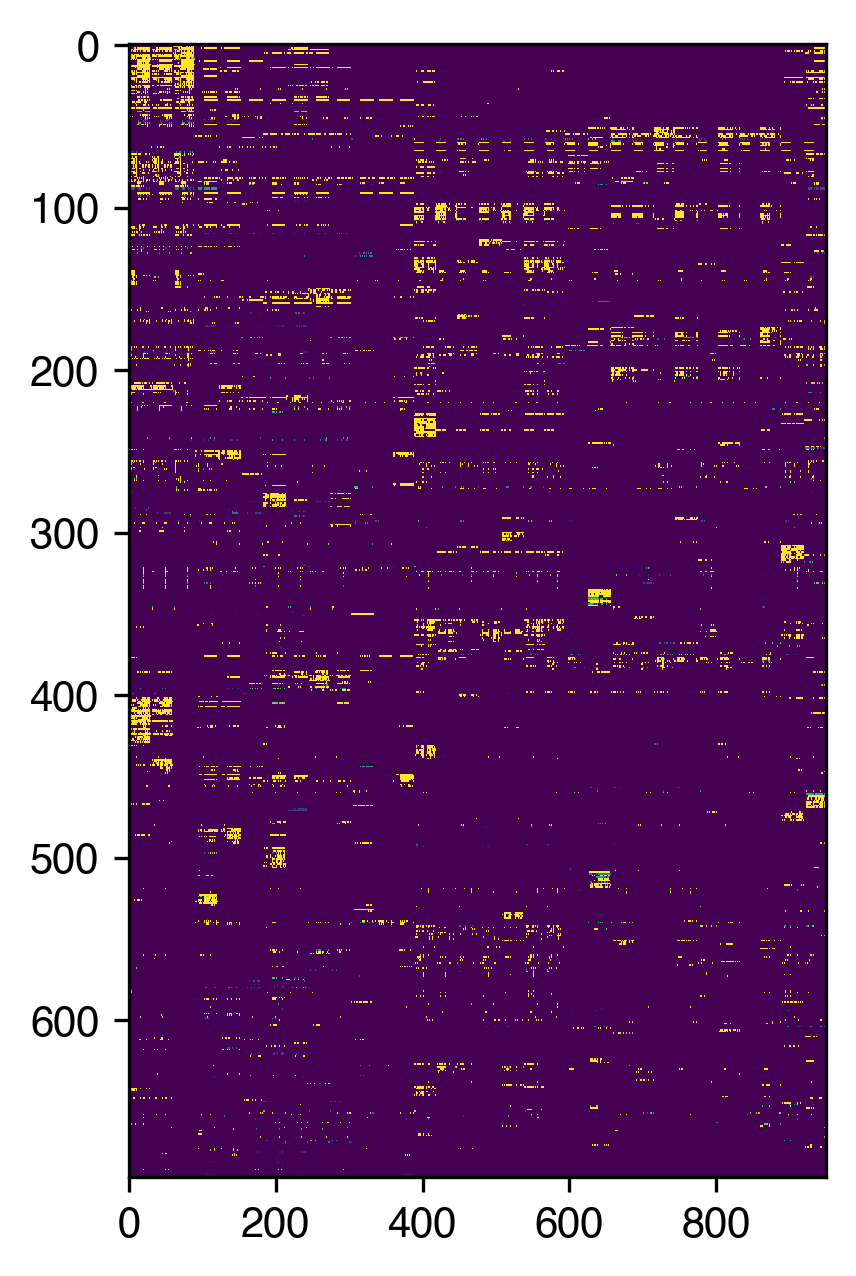

In [14]:
plt.figure(figsize=(3, 5), dpi=300)
plt.imshow(gene_dmr_counts.values, vmin=3, vmax=30, aspect='auto')